# Linear regression
Linear regression is a statistical method

it makes a stastical line using the equation y =mx+c
 

it can actully predict furure.

but how ?

it predicts future values by establishing a relationship between one or more independent variables (predictors) and a dependent variable (outcome).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
# so we will put the data we observed over in list 
# why we put that in np.array cause its faster than python list (aka simple list(datatype = [] ))

years=np.array([2001,2002,2003,2004])
# we aint added 2010 cause we aint had the data of 2010

revenue=np.array([0,10,20,30])

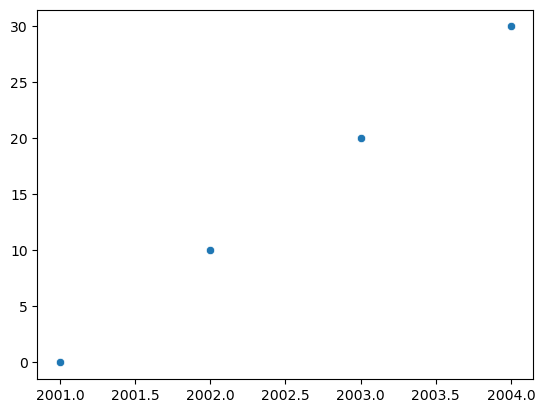

In [3]:
sn.scatterplot(x=years,y=revenue)
plt.show()

# here we can see that data is upgradaing 
# we will not talk about profits and loss and other things 
# its h=just for ths visualisation about how it works
# i think graph made things pretty clear

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Salary_Data.csv")

df

# coloums are also knows as variables

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [6]:
# i want to check first 5 rows to undestand/visualize the data

df.head()
# in () we aint mentoned anything so by default we will see only 5 coloums
# but if we mentioned 10 then it will show 10 rows df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
# from this data we only want Years of Experience	and Salary

# so we will use 
# Years of Experience as feature 
# Salary as target

# so can use??
# Years of Experience as target 
# Salary as feature

# well yes we can 

# target = what we want to predict
# Definition: The target (or label) is the output variable that you want to predict. It represents the outcome you are interested in.

# feature = data on which we want to predic the feature
# Definition: Features (or predictors) are the input variables used to make predictions. They represent the characteristics or attributes of the data.

In [8]:
# [:no of rows we want, coloumn indexing (no of row we want - 1) ]

# df.iloc[:375, 4]

# and to get all the rows we will [:,]
# df.iloc[:, 4]

# let put that in a variable and move on to our y axis

yearOfexp = df.iloc[:, 4]

yearOfexp

0       5.0
1       3.0
2      15.0
3       7.0
4      20.0
       ... 
370     8.0
371    19.0
372     2.0
373     7.0
374    15.0
Name: Years of Experience, Length: 375, dtype: float64

In [9]:
# same as yearOfexp = df.iloc[:, 4]

y = df["Years of Experience"]

In [10]:
np.array(yearOfexp)

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. ,  3. ,
       18. ,  6. , 14. ,  2. , 16. ,  7. , 12. ,  0. , 22. ,  5. , 19. ,
        2. ,  9. , 13. ,  3. , 11. ,  1. , 15. ,  6. , 25. ,  4. ,  3. ,
       10. , 20. ,  2. ,  7. , 14. ,  1. , 21. ,  5. , 18. ,  3. ,  8. ,
       13. ,  2. ,  5. , 16. , 11. ,  0. , 22. ,  7. , 12. , 19. ,  3. ,
        9. ,  2. , 17. ,  4. ,  7. , 23. ,  3. , 12. , 21. ,  1. , 10. ,
       19. ,  5. ,  8. , 18. ,  6. , 11. , 16. ,  2. , 14. , 10. , 22. ,
        6. , 20. ,  3. ,  8. , 13. ,  0. , 24. ,  2. , 10. ,  2. , 15. ,
       21. ,  6. , 11. ,  3. , 18. , 25. ,  7. , 12. , 22. ,  1. , 10. ,
       20. ,  5. ,  8. , 19. ,  5. , 13. , 16. ,  3. ,  7. , 14. ,  2. ,
       15. ,  9. , 22. ,  6. ,  0.5,  6. , 15. , 20. ,  3. , 10. , 17. ,
       25. ,  5. , 11. , 16. ,  2. ,  9. , 18. ,  4. ,  8. , 21. ,  3. ,
       12. , 22. ,  1. , 10. , 19. ,  4. ,  7. , 14. ,  2. , 13. ,  5. ,
       20. ,  1.5,  8. , 16. ,  4. , 10. , 19. ,  3

In [11]:
# lets check the dimention of our array 
np.array(yearOfexp).ndim

# so its a one d array

1

In [12]:
# alot of nan is in the data 
# so lets check it 
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [13]:
# we can delete the nan value by using dropna

df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [15]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [16]:
salary = df.Salary
salary

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

In [20]:
# but we only need Years of Experience and Salary so we will remove nan from these 2 only

df1 = df.iloc[:,[4,5]]
df1

# so we will delete all null value of it by using dropna()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


In [23]:
filterd_data = df1.dropna()
filterd_data
# before df1.dropna() we had 375 rows 
# after this we have 373 rows 
# so 2 nan valus delete
# our data is filters now

# lets check if any nan value is in this data

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


In [24]:
filterd_data.isnull().sum()

# see no nan value is there

Years of Experience    0
Salary                 0
dtype: int64

In [25]:
# now we need to make this data in a 2d format

np.array(filterd_data['Years of Experience'])
# but this is 1 d

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. ,  3. ,
       18. ,  6. , 14. ,  2. , 16. ,  7. , 12. ,  0. , 22. ,  5. , 19. ,
        2. ,  9. , 13. ,  3. , 11. ,  1. , 15. ,  6. , 25. ,  4. ,  3. ,
       10. , 20. ,  2. ,  7. , 14. ,  1. , 21. ,  5. , 18. ,  3. ,  8. ,
       13. ,  2. ,  5. , 16. , 11. ,  0. , 22. ,  7. , 12. , 19. ,  3. ,
        9. ,  2. , 17. ,  4. ,  7. , 23. ,  3. , 12. , 21. ,  1. , 10. ,
       19. ,  5. ,  8. , 18. ,  6. , 11. , 16. ,  2. , 14. , 10. , 22. ,
        6. , 20. ,  3. ,  8. , 13. ,  0. , 24. ,  2. , 10. ,  2. , 15. ,
       21. ,  6. , 11. ,  3. , 18. , 25. ,  7. , 12. , 22. ,  1. , 10. ,
       20. ,  5. ,  8. , 19. ,  5. , 13. , 16. ,  3. ,  7. , 14. ,  2. ,
       15. ,  9. , 22. ,  6. ,  0.5,  6. , 15. , 20. ,  3. , 10. , 17. ,
       25. ,  5. , 11. , 16. ,  2. ,  9. , 18. ,  4. ,  8. , 21. ,  3. ,
       12. , 22. ,  1. , 10. , 19. ,  4. ,  7. , 14. ,  2. , 13. ,  5. ,
       20. ,  1.5,  8. , 16. ,  4. , 10. , 19. ,  3

In [143]:
# Converting data to 2d array

# 2d
# so we will run a loop on it 

cont_x=[]
for i in filterd_data['Years of Experience']:
#     print (i)
#     so after doing print i it prints alll the data
#     so now we will put all these values in cont_x
#     print ([i])
#     so if we make i a list and print it in the cont_x we made then we willl get a 2d array
#     
    cont_x.append([i])
print (cont_x)


[[5.0], [3.0], [15.0], [7.0], [20.0], [2.0], [12.0], [4.0], [1.0], [10.0], [3.0], [18.0], [6.0], [14.0], [2.0], [16.0], [7.0], [12.0], [0.0], [22.0], [5.0], [19.0], [2.0], [9.0], [13.0], [3.0], [11.0], [1.0], [15.0], [6.0], [25.0], [4.0], [3.0], [10.0], [20.0], [2.0], [7.0], [14.0], [1.0], [21.0], [5.0], [18.0], [3.0], [8.0], [13.0], [2.0], [5.0], [16.0], [11.0], [0.0], [22.0], [7.0], [12.0], [19.0], [3.0], [9.0], [2.0], [17.0], [4.0], [7.0], [23.0], [3.0], [12.0], [21.0], [1.0], [10.0], [19.0], [5.0], [8.0], [18.0], [6.0], [11.0], [16.0], [2.0], [14.0], [10.0], [22.0], [6.0], [20.0], [3.0], [8.0], [13.0], [0.0], [24.0], [2.0], [10.0], [2.0], [15.0], [21.0], [6.0], [11.0], [3.0], [18.0], [25.0], [7.0], [12.0], [22.0], [1.0], [10.0], [20.0], [5.0], [8.0], [19.0], [5.0], [13.0], [16.0], [3.0], [7.0], [14.0], [2.0], [15.0], [9.0], [22.0], [6.0], [0.5], [6.0], [15.0], [20.0], [3.0], [10.0], [17.0], [25.0], [5.0], [11.0], [16.0], [2.0], [9.0], [18.0], [4.0], [8.0], [21.0], [3.0], [12.0], [2

In [67]:
# to check the dimention of the array
np.ndim(cont_x)

2

In [36]:
# we can use list comprehennsion to do all this code 
cont_x1 = [[i] for i in filterd_data['Years of Experience']]
print("Cont_x1",cont_x1)

Cont_x1 [[5.0], [3.0], [15.0], [7.0], [20.0], [2.0], [12.0], [4.0], [1.0], [10.0], [3.0], [18.0], [6.0], [14.0], [2.0], [16.0], [7.0], [12.0], [0.0], [22.0], [5.0], [19.0], [2.0], [9.0], [13.0], [3.0], [11.0], [1.0], [15.0], [6.0], [25.0], [4.0], [3.0], [10.0], [20.0], [2.0], [7.0], [14.0], [1.0], [21.0], [5.0], [18.0], [3.0], [8.0], [13.0], [2.0], [5.0], [16.0], [11.0], [0.0], [22.0], [7.0], [12.0], [19.0], [3.0], [9.0], [2.0], [17.0], [4.0], [7.0], [23.0], [3.0], [12.0], [21.0], [1.0], [10.0], [19.0], [5.0], [8.0], [18.0], [6.0], [11.0], [16.0], [2.0], [14.0], [10.0], [22.0], [6.0], [20.0], [3.0], [8.0], [13.0], [0.0], [24.0], [2.0], [10.0], [2.0], [15.0], [21.0], [6.0], [11.0], [3.0], [18.0], [25.0], [7.0], [12.0], [22.0], [1.0], [10.0], [20.0], [5.0], [8.0], [19.0], [5.0], [13.0], [16.0], [3.0], [7.0], [14.0], [2.0], [15.0], [9.0], [22.0], [6.0], [0.5], [6.0], [15.0], [20.0], [3.0], [10.0], [17.0], [25.0], [5.0], [11.0], [16.0], [2.0], [9.0], [18.0], [4.0], [8.0], [21.0], [3.0], [1

In [35]:
# to check the dimention of the array
np.ndim(cont_x1)

2

In [69]:
# dk what i was trying to do

# m = np.array(filterd_data['Years of Experience'])
# m.values


In [72]:
# lets more shortify this code

X = np.array([[i]for i in filterd_data['Years of Experience']])

# x

In [73]:
# we will do tha same with the salary

Y = np.array([[i]for i in filterd_data['Salary']])

# y

# or

Y=np.array(filterd_data['Salary'])
# y

In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
# lets train our model

model=LinearRegression()


In [49]:
# fit function to fit the data we just have to pass x and y


model.fit(x,y)
# so model is trained

LinearRegression()

In [50]:
# we passed the feature 
# that what is 15yr old person salary

model.predict([[15]])

# we passes this in a 2d arrya
# cause while we were training this the feature was 2d array 
# so for prediction we will pass it in 2d array

# and the target we get will be in 1d array


array([134588.87463431])

In [51]:
# Years of Experience

# to check array is 2d or 1d
X

array([[ 5. ],
       [ 3. ],
       [15. ],
       [ 7. ],
       [20. ],
       [ 2. ],
       [12. ],
       [ 4. ],
       [ 1. ],
       [10. ],
       [ 3. ],
       [18. ],
       [ 6. ],
       [14. ],
       [ 2. ],
       [16. ],
       [ 7. ],
       [12. ],
       [ 0. ],
       [22. ],
       [ 5. ],
       [19. ],
       [ 2. ],
       [ 9. ],
       [13. ],
       [ 3. ],
       [11. ],
       [ 1. ],
       [15. ],
       [ 6. ],
       [25. ],
       [ 4. ],
       [ 3. ],
       [10. ],
       [20. ],
       [ 2. ],
       [ 7. ],
       [14. ],
       [ 1. ],
       [21. ],
       [ 5. ],
       [18. ],
       [ 3. ],
       [ 8. ],
       [13. ],
       [ 2. ],
       [ 5. ],
       [16. ],
       [11. ],
       [ 0. ],
       [22. ],
       [ 7. ],
       [12. ],
       [19. ],
       [ 3. ],
       [ 9. ],
       [ 2. ],
       [17. ],
       [ 4. ],
       [ 7. ],
       [23. ],
       [ 3. ],
       [12. ],
       [21. ],
       [ 1. ],
       [10. ],
       [19

In [52]:
# Salary

# to check array is 2d or 1d
Y

array([ 90000.,  65000., 150000.,  60000., 200000.,  55000., 120000.,
        80000.,  45000., 110000.,  75000., 140000.,  65000., 130000.,
        40000., 125000.,  90000., 115000.,  35000., 180000.,  80000.,
       190000.,  50000.,  60000., 140000.,  45000., 110000.,  40000.,
       140000.,  90000., 250000.,  55000.,  75000.,  65000., 170000.,
        45000.,  60000., 115000.,  40000., 160000.,  80000., 190000.,
        60000.,  45000., 130000.,  40000.,  75000., 180000., 120000.,
        35000., 130000.,  85000.,  60000., 200000.,  50000.,  95000.,
        65000., 140000.,  55000., 105000., 170000.,  50000.,  80000.,
       180000.,  35000.,  90000., 120000.,  45000.,  90000., 150000.,
        65000.,  70000., 190000.,  40000., 120000.,  95000., 160000.,
       100000., 180000.,  55000.,  70000.,  80000.,  30000., 250000.,
        40000.,  95000.,  45000.,  80000., 135000.,  55000., 120000.,
        40000., 105000., 170000.,  75000.,  65000., 160000.,  35000.,
        90000., 1100

In [53]:
filterd_data

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


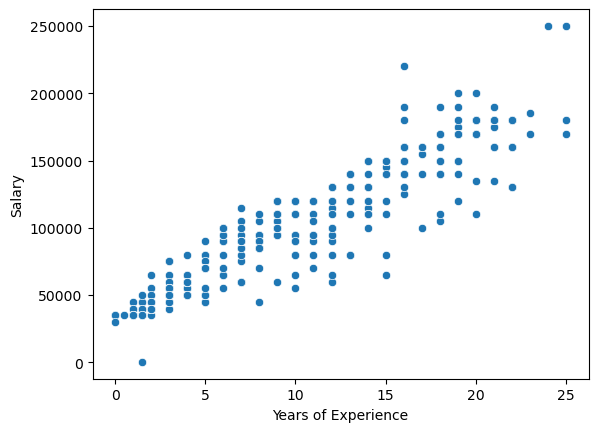

In [58]:
# Normal data without any prediction

# actual visual of data
# these x and y are default arguments
sn.scatterplot(x=filterd_data['Years of Experience'],y=filterd_data['Salary'])
# always keep parameter as x= and y= 
# x and y both should be 1d array 
# so if the data is in 2 d array we can use flatten() to convert into 1d 
# usecase: flatten()
plt.show()

In [77]:
# After predition of year of Experience

# so lets ask our model to predict salay of the data saet we made without null variables

# X

# so this is the year of experience
# X is in 2d array
# then no need to pas in []
# model.predict(x)

# so the prediction and real data can be diff

# eg
# 5.0	Years of Experience 	Salary	90000.0
# but our prediction is 66143.76948947

# lets save it into x_predict_salary variable
x_predict_salary = model.predict(x)

x_predict_salary

array([ 66143.76948947,  52454.7484605 , 134588.87463431,  79832.79051843,
       168811.42720673,  45610.23794601, 114055.34309085,  59299.25897498,
        38765.72743153, 100366.32206189,  52454.7484605 , 155122.40617776,
        72988.28000395, 127744.36411982,  45610.23794601, 141433.38514879,
        79832.79051843, 114055.34309085,  31921.21691704, 182500.4482357 ,
        66143.76948947, 161966.91669224,  45610.23794601,  93521.8115474 ,
       120899.85360534,  52454.7484605 , 107210.83257637,  38765.72743153,
       134588.87463431,  72988.28000395, 203033.97977915,  59299.25897498,
        52454.7484605 , 100366.32206189, 168811.42720673,  45610.23794601,
        79832.79051843, 127744.36411982,  38765.72743153, 175655.93772121,
        66143.76948947, 155122.40617776,  52454.7484605 ,  86677.30103292,
       120899.85360534,  45610.23794601,  66143.76948947, 141433.38514879,
       107210.83257637,  31921.21691704, 182500.4482357 ,  79832.79051843,
       114055.34309085, 1

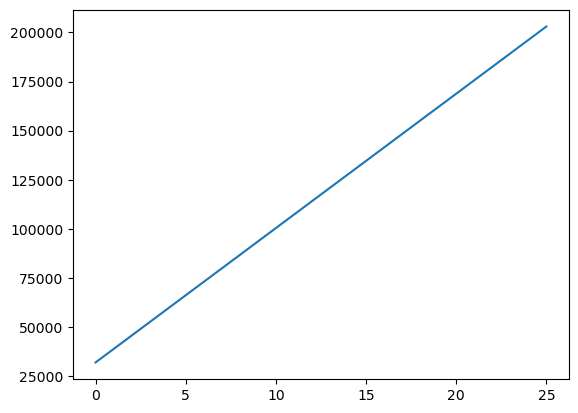

In [81]:
# so lets make a graph on the basis of prediction of salary on ear of experience  

sn.lineplot(x=X.flatten(),y=x_predict_salary)
plt.show()

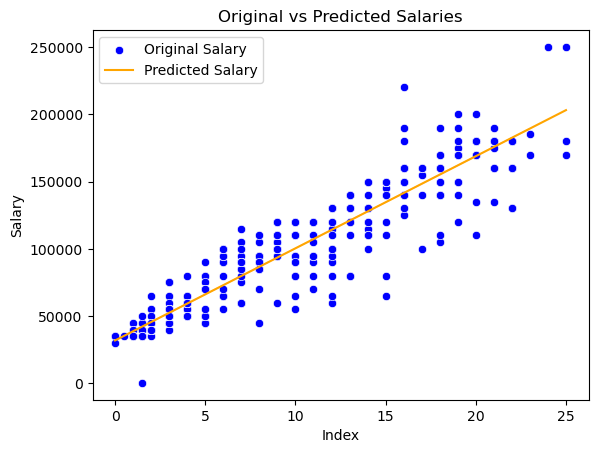

In [104]:
# so lets make a graph on the diffecence on before and after prediction of salary on ear of experience  

# Original salary
sn.scatterplot(x=X.flatten(), y=Y, label='Original Salary', color='blue')
# predicted salary
sn.lineplot(x=X.flatten(), y=x_predict_salary, label='Predicted Salary', color='orange')

# Adding titles and labels
plt.title('Original vs Predicted Salaries')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.legend()

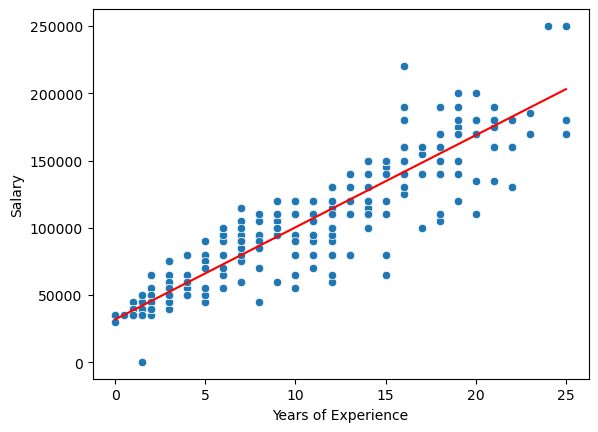

In [106]:
# same as what i did above

sn.scatterplot(x=filterd_data['Years of Experience'],y=filterd_data['Salary'])
sn.lineplot(x=filterd_data['Years of Experience'],y=predicted_salary,color='red')
plt.show()

<Axes: >

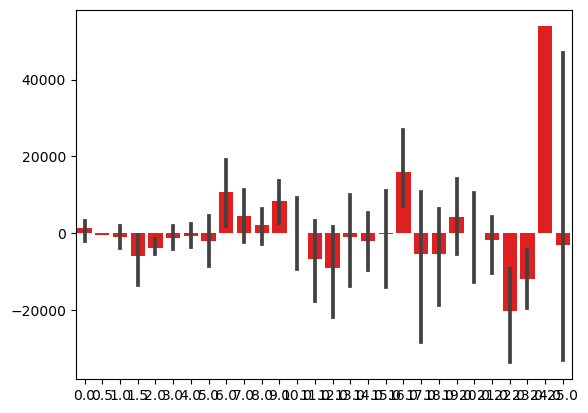

In [142]:

# lets get the difference in salaries before and after prediction
# before salary is denoted as Y as i mentioned in shell above
# after salary is denoted as x_predict_salary it is also mentioned in shell above

# so we will get the difference

difference = Y-x_predict_salary

# Check lengths
# print("Length of Y:", len(Y))
# print("Length of x_predict_salary:", len(x_predict_salary))
# print("Length of difference:", len(difference))

# we willl make a line graph to know the difference
# here we placed X as year of experience and y as difference
# and flattern to make the values in the desired dimention
sn.barplot(x=X.flatten(),y=difference.flatten(),color='red')


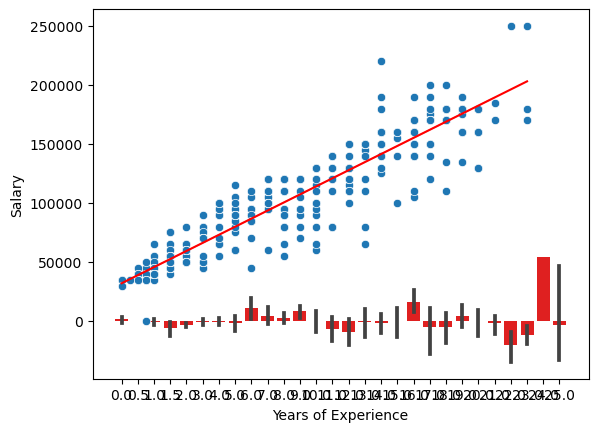

In [141]:
# sn.barplot(x=X.flatten(),y=difference.flatten(),color='red')
# sn.scatterplot(x=filterd_data['Years of Experience'],y=filterd_data['Salary'])
# sn.lineplot(x=filterd_data['Years of Experience'],y=predicted_salary,color='red')
# plt.show()